# Importamos paquetes

sdf_helper para leer los datos, Pandas para procesarlos, Numpy para trabajar con los arrays, Matplotlib para crear las gráficas

In [1]:
import sdf_helper as sh
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import functools

# Importamos los datos

Importamos los 100 outputs producidos por la simulación, que se corresponden a cada step de $5\,\mathrm{fs}$

In [2]:
data = sh.getdata(0, 'output')
sh.list_variables(data)

Reading file ./0000.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
CPUs_Current_rank <class 'sdf.BlockPlainVariable'> [0, 0]
CPUs_Original_rank <class 'sdf.BlockPlainVariable'> [1, 1]
Derived_Number_Density <class 'sdf.BlockPlainVariable'> [1500,  300]
Derived_Number_Density_electron <class 'sdf.BlockPlainVariable'> [1500,  300]
Derived_Number_Density_ions <class 'sdf.BlockPlainVariable'> [1500,  300]
Electric_Field_Ex <class 'sdf.BlockPlainVariable'> [1500,  300]
Electric_Field_Ey <class 'sdf.BlockPlainVariable'> [1500,  300]
Grid_CPUs_Original_rank <class 'sdf.BlockPlainMesh'> [2, 2]
Grid_CPUs_Original_rank_mid <class 'sdf.BlockPlainMesh'> [1, 1]
Grid_Grid <class 'sdf.BlockPlainMesh'> [1501,  301]
Grid_Grid_mid <class 'sdf.BlockPlainMesh'> [1500,  300]
Wall_time <class 'sdf.BlockConstant'> [1]


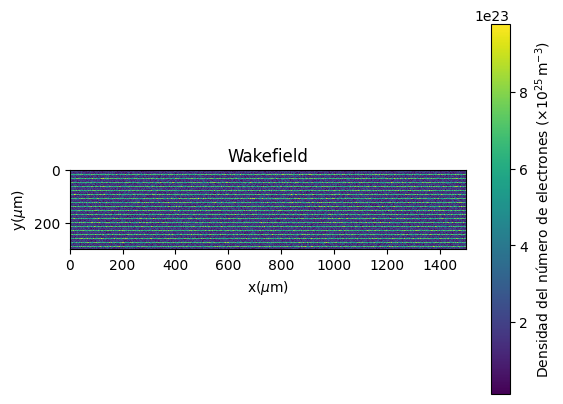

In [3]:
data_375fs = sh.getdata(0, 'output')
densidad_numero_e = data_375fs.Derived_Number_Density_electron
raw = densidad_numero_e.data

fig, ax = plt.subplots()
ax.set_xlabel(r'x($\mu$m)')
ax.set_ylabel(r'y($\mu$m)')
ax.set_title('Wakefield')

im = ax.imshow(raw.T, interpolation='none')

cbar = fig.colorbar(im)
cbar.set_label(r'Densidad del número de electrones ($\times10^{25}\,\mathrm{m}^{-3}$)')

plt.show()

# Animación

Vamos a intentar hacer una animación de la evolución de la densidad de electrones

In [4]:
data_list = [sh.getdata(i, 'output').Derived_Number_Density_electron.data for i in range(40)]

Reading file ./0001.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0002.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0003.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0004.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0005.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0006.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0007.sd

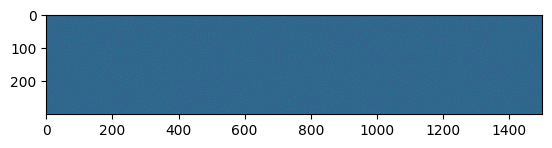

In [5]:
fig, ax = plt.subplots()

ims = []
for i in range(len(data_list)):
    im = ax.imshow(data_list[i].T, animated=True)
    if i == 0:
        ax.imshow(data_list[i].T)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=100, blit=False, repeat_delay=1000)
ani.save("number_density.gif")

# Campo eléctrico longitudinal

Plot de la evolución del campo eléctrico longitudinal a lo largo del eje x

In [6]:
electric_fields = [sh.getdata(i, 'output').Electric_Field_Ex.data for i in range(40)]

Reading file ./0000.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0001.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0002.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0003.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0004.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0005.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid
Reading file ./0006.sd

Reading file ./0019.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid


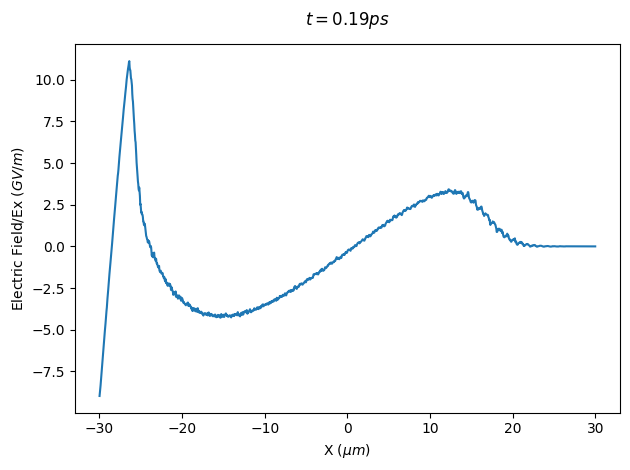

In [7]:
sh.plot1d(sh.getdata(19, 'output').Electric_Field_Ex)

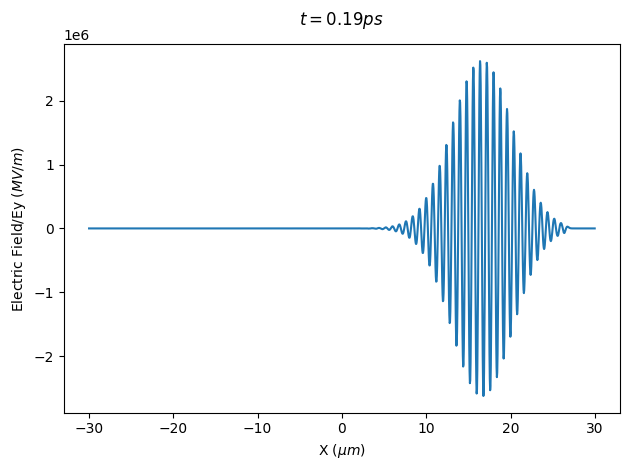

In [8]:
sh.plot1d(sh.getdata(19, 'output').Electric_Field_Ey)

Reading file ./0020.sdf
t() = time
ex(1500, 300) = ex
ey(1500, 300) = ey
x(1501, 301) = grid
y(1501, 301) = grid
xc(1500, 300) = grid_mid
yc(1500, 300) = grid_mid


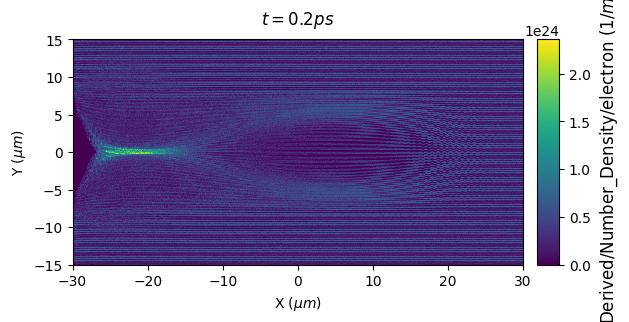

In [9]:
sh.plot_auto(sh.getdata(20, 'output').Derived_Number_Density_electron)